In [406]:
#this function will pass the ior file and return the Max read or write
def maxior(filename, kword):
    import re
    import sys

    file = open(filename, "r")
    for line in file:
        if re.search(kword, line):
              str_line=line.split(" ")
              str_list = filter(None, str_line)
              return (str_list[2])

def getread(x):
    for f in x[2]:
        maxior(f,"Max Read")
def getwrite(x):
    for f in x[2]:
        maxior(f,"Max Write")   

In [407]:
dir="/global/homes/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/tmp_has_per_write"

In [408]:
cd $dir

/global/u1/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/tmp_has_per_write


In [409]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import os
import numpy as np
def ior_forjob(dir,jobid,keywords,tt):
    xdir=os.listdir(dir)
    xjob=[x for x in xdir if jobid in x]
    readmax=list()
    writemax=list()
    print "Number of Jobs:%d"%len(xjob)#,xjob
    for x in xjob:
        cur=maxior(x,keywords)
        writemax.append(cur)
    xjob=[x.split('.')[1] for x in xjob] # get job nodes.cores config
    xjob=np.asarray(xjob)
    import pandas as pd
    dfwrite=pd.DataFrame(data=xjob,columns=["setting"],index=None) # construct dataframe
    dfwrite['writemax']=writemax
    dfwrite=dfwrite[dfwrite.writemax.astype('str') != 'None'] # remove none value
    print "Number of Completed Jobs:%d"%len(dfwrite.writemax)
    dfwrite['nodes'], dfwrite['cores']=dfwrite['setting'].str.split('x', 1).str
    del dfwrite['setting']
    dfwrite=dfwrite.sort_values(by=['nodes','cores'],axis=0)
    dfwrite.writemax=dfwrite.writemax.astype('float')
    dfwrite.nodes=dfwrite.nodes.astype('int')
    dfwrite.cores=dfwrite.cores.astype('int')
    dfwrite['nodecore']=dfwrite.nodes.astype('str')+'-'+dfwrite.cores.astype('str')
    dfwrite=dfwrite.reset_index(drop=True)
    return dfwrite
def ior_plot(dfwrite,keywords,tt):
    plt.xticks(range(len(dfwrite.nodes)),dfwrite.nodecore)
    plt.plot(range(len(dfwrite.nodecore)),dfwrite.writemax,'-o')
    plt.xlabel('Nodes-Cores')
    plt.ylabel('MiB/s')
    plt.title(tt+","+keywords)
    plt.xticks(rotation=80 )
    plt.grid(True)
def ior_plot_two(dfknl,dfhas,tt):
    plt.xticks(range(len(dfknl.nodes)),dfknl.nodecore)
    plt.plot(range(len(dfknl.nodecore)),dfknl.writemax,'-o',label="KNL")
    has_x=range(len(dfhas.nodecore))
    #add gap in has x
    i=6
    while i<= len(has_x):
        j=i # do a shift on every 7th element and its afterwards
        while j < len(has_x):
            has_x[j]+=1
            j+=1
        i=i+6
    plt.plot(has_x,dfhas.writemax,'-^',label="Haswell")
    plt.xlabel('Nodes-Cores')
    plt.ylabel('MiB/s')
    plt.title(tt)
    plt.xticks(rotation=90 )
    plt.grid(True)
    plt.legend()

Number of Jobs:24
Number of Completed Jobs:23


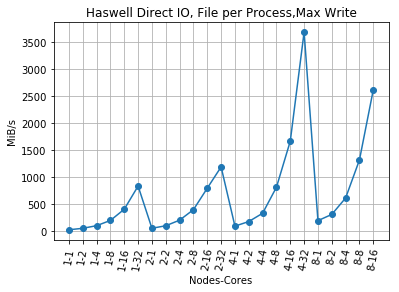

In [410]:
jobid="4603772"
keyword="Max Write"
tt='Haswell Direct IO, File per Process'
dfhas=ior_forjob(dir,jobid,keyword,tt)
ior_plot(dfhas,keyword,tt)

Number of Jobs:28
Number of Completed Jobs:28


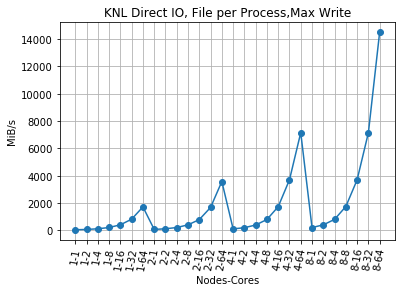

In [384]:
jobid="4603792"
keyword="Max Write"
tt='KNL Direct IO, File per Process'
dfknl=ior_forjob(dir,jobid,keyword,tt)
ior_plot(dfknl,keyword,tt)

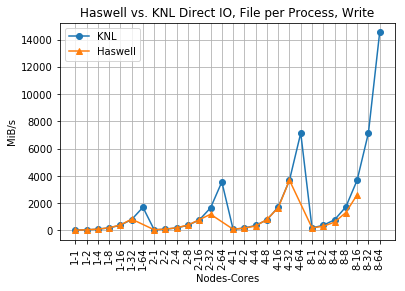

In [385]:
tt='Haswell vs. KNL Direct IO, File per Process, Write'
ior_plot_two(dfknl,dfhas,tt)

In [411]:
dirr="/global/homes/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/tmp_has_default_read"

In [412]:
cd $dirr

/global/u1/j/jialin/heterogeneous-IO/cpu/script/ior/ior_test/tmp_has_default_read


Number of Jobs:23
Number of Completed Jobs:23


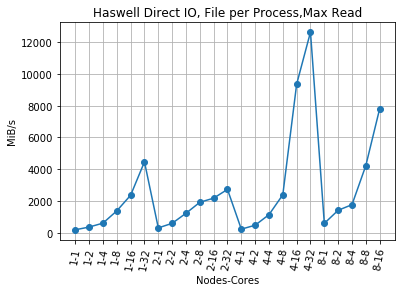

In [416]:
jobid="4603772"
keyword="Max Read"
tt='Haswell Direct IO, File per Process'
dfhasr=ior_forjob(dirr,jobid,keyword,tt)
ior_plot(dfhasr,keyword,tt)

Number of Jobs:28
Number of Completed Jobs:27


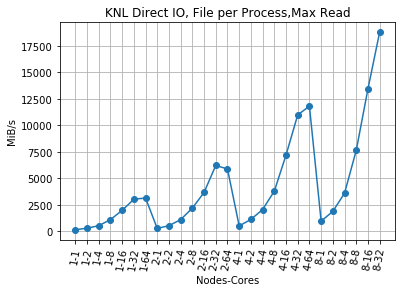

In [417]:
jobid="4603792"
keyword="Max Read"
tt='KNL Direct IO, File per Process'
dfknlr=ior_forjob(dirr,jobid,keyword,tt)
ior_plot(dfknlr,keyword,tt)

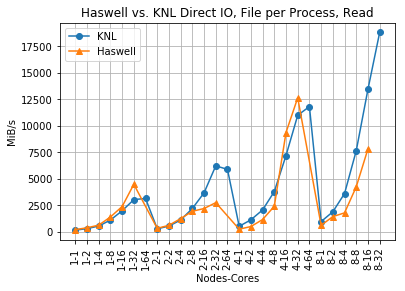

In [418]:
tt='Haswell vs. KNL Direct IO, File per Process, Read'
ior_plot_two(dfknlr,dfhasr,tt)